# HSC-Y1 Convergence map dataset
### Author: Joaquin Armijo
Data created by Gabriela Marques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/

HSC_NG_ConvergenceMaps.ipynb
HSC_NG_ConvergenceMaps_.ipynb
HSC-Y1_convergence_kappaEBmodes_6areas_4zbins_2arcmin.hdf5
mock_cosmovaried_HSC-Y1_convergence_kappaEmode_6areas_4zbins_2arcmin.hdf5
mock_fiducial_HSC-Y1_convergence_kappaEmode_6areas_4zbins_2arcmin.hdf5


In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

## Real data

Data is stored in HDF5 format to organize the different layers of the data. HSC is distributed in different areas on the sky (6 areas in a few hundreds sq. degrees). In general these $\kappa$-maps are organized in different redshift bins and smoothing scales. The data also have E-modes and B-modes (for null test).



In [ ]:
HSCrealdata_kappamaps = h5py.File('drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/HSC-Y1_convergence_kappaEBmodes_6areas_4zbins_2arcmin.hdf5')

In [ ]:
HSCrealdata_kappamaps.keys(),HSCrealdata_kappamaps['data'].keys() #names for area patches

(<KeysViewHDF5 ['data']>,
 <KeysViewHDF5 ['gama09h', 'gama15h', 'hectomap', 'vvds', 'wide12h', 'xmm']>)

In [ ]:
HSCrealdata_kappamaps['data/gama09h'].keys()

<KeysViewHDF5 ['z1', 'z2', 'z3', 'z4']>

In [ ]:
HSCrealdata_kappamaps['data/gama09h']['z1'][:].shape #data for each redshift bin. This version has 2 maps (for E-modes and B-modes), for 1 smoothing scale (2 arcmin). The map for this patch is a rectangular with 432x701 pixels.

(2, 1, 432, 701)

### Plot data for each area

0.02 0.02


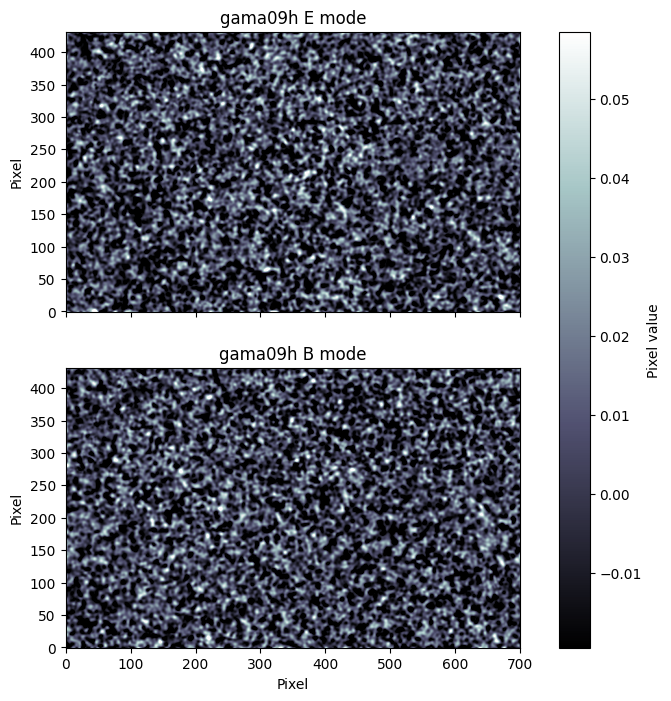

0.02 0.02


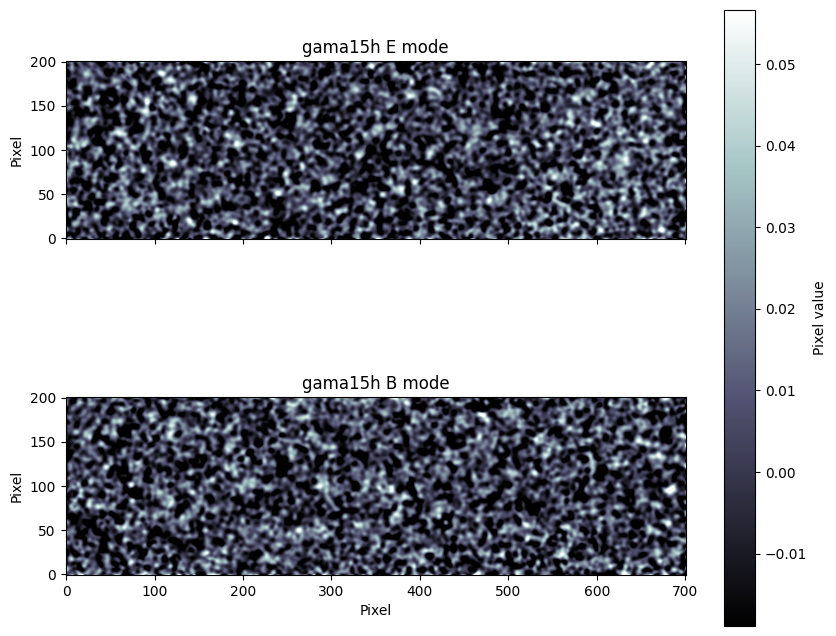

0.02 0.02


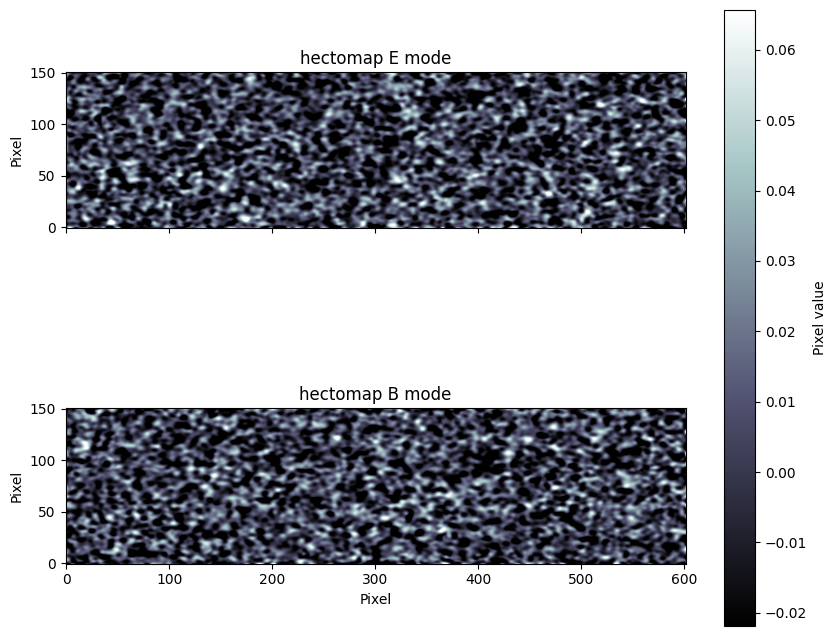

0.02 0.02


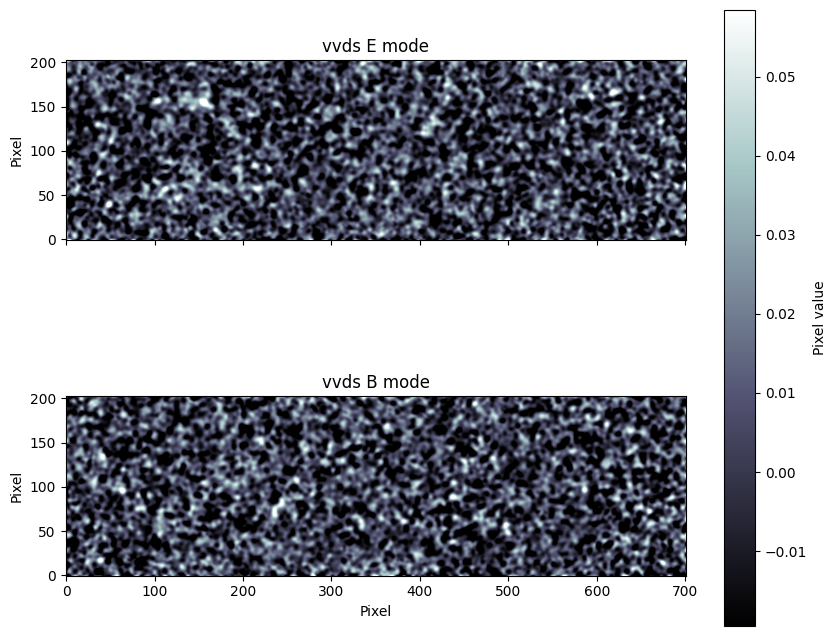

0.02 0.02


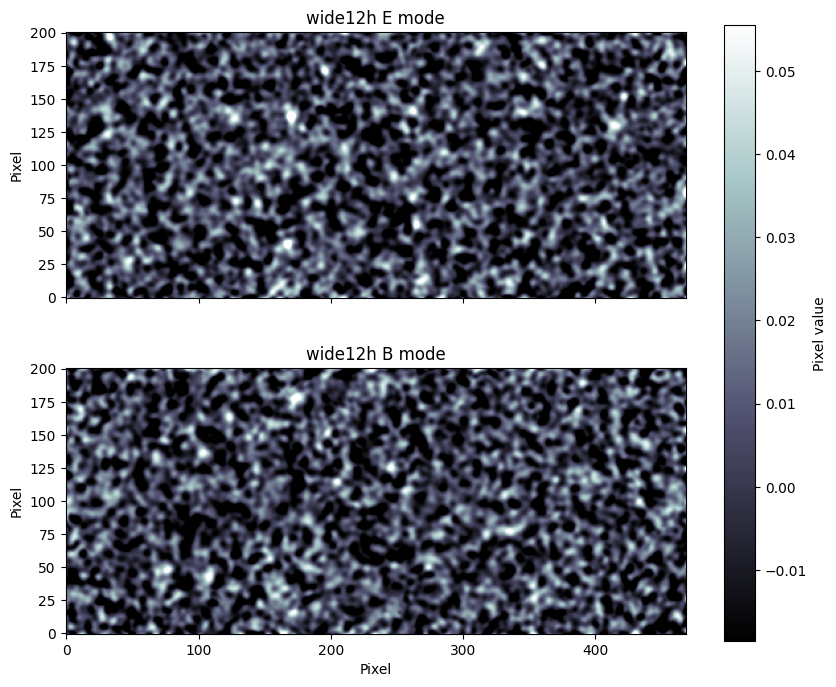

0.02 0.02


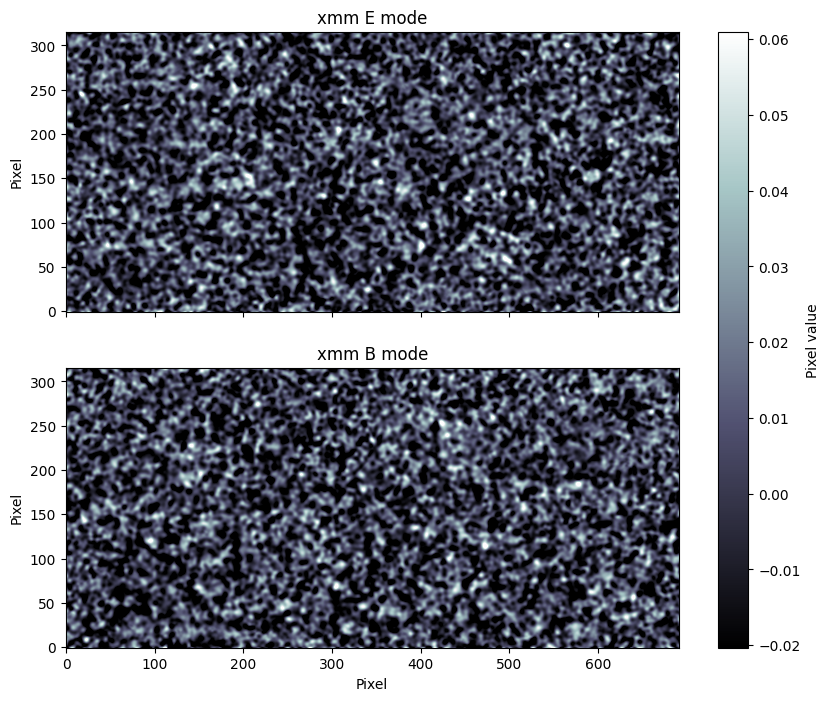

In [ ]:
areas = list(HSCrealdata_kappamaps['data'].keys())
for area in areas:
    kappa_Emode = HSCrealdata_kappamaps['data/{0}'.format(area)]['z1'][:][0,0,:,:]
    kappa_Bmode = HSCrealdata_kappamaps['data/{0}'.format(area)]['z1'][:][1,0,:,:]
    std_kappa_Emode = np.std(kappa_Emode)
    std_kappa_Bmode = np.std(kappa_Bmode)
    print('%.3lf %.3lf'%(std_kappa_Emode,std_kappa_Bmode))
    f,ax = plt.subplots(2,1,figsize=(10,8),sharex=True,sharey=True)
    ax[0].set_title('{0} E mode'.format(area))
    ax[1].set_title('{0} B mode'.format(area))
    ax[0].imshow(kappa_Emode,origin='lower',cmap='bone',vmin=-std_kappa_Emode,vmax=3*std_kappa_Emode)
    c1 = ax[1].imshow(kappa_Bmode,origin='lower',cmap='bone',vmin=-std_kappa_Bmode,vmax=3*std_kappa_Bmode)
    ax[0].set_ylabel('Pixel')
    ax[1].set_ylabel('Pixel')
    ax[1].set_xlabel('Pixel')
    b1 = plt.colorbar(c1,ax=ax)
    b1.set_label('Pixel value')
    #plt.tight_layout()
    #plt.subplots_adjust(hspace=0.1)
    plt.show()

## Fiducial and cosmovaried mocks

The dataset includes mock catalogues with fiducial and cosmology varied simulations.

In [ ]:
HSCfiducial_kappamaps = h5py.File('drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/mock_fiducial_HSC-Y1_convergence_kappaEmode_6areas_4zbins_2arcmin.hdf5')
HSCcosmovaried_kappamaps = h5py.File('drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/mock_cosmovaried_HSC-Y1_convergence_kappaEmode_6areas_4zbins_2arcmin.hdf5')

Data is organized in the same way (only E modes), fiducial inclues 100 realizations for each map, and cosmovaried includes 100 pairs of $\Omega_m$ and $\sigma_8$ cosmological parameters, with 5 realizations for each cosmology. Maps have been smoothed with a 2 arcmin Gaussian kernel.

# HSC-Y1 NG statistics

For further exploration we include the summary NG-statistic (Power spectrum, PDF, peaks, minima) used for the cosmological inference of the HSC-Y1 convergence maps (See Marques et al. 2023, Thiele et al. 2023). The data includes more smoothing scales and all the runs for fiducial and cosmovaried maps.

In [ ]:
stats_HSCrealdata_kappamaps = h5py.File('drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/stats_HSC-Y1_convergence_6areas_4zbins_6smootingscales.hdf5')
stats_HSCfiducial_kappamaps = h5py.File('drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/stats_mockfiducial_HSC-Y1_convergence_6areas_4zbins_2267real_6smootingscales.hdf5')
stats_HSCcosmovaried_kappamaps = h5py.File('drive/MyDrive/ai4phys2024_hackathon_files/HSC_NG/stats_mockcosmovaried_HSC-Y1_convergence_6areas_100cosmo_4zbins_50real_6smootingscales.hdf5')

In [ ]:
stats_HSCrealdata_kappamaps['statistics/realdata/gama09h/'].keys(),stats_HSCfiducial_kappamaps['statistics/fiducial/gama09h/'].keys(),stats_HSCrealdata_kappamaps['statistics/realdata/gama09h/'].keys(),stats_HSCcosmovaried_kappamaps['statistics/cosmovaried/gama09h/'].keys()

(<KeysViewHDF5 ['C_ell', 'Minima', 'PDF', 'Peaks']>,
 <KeysViewHDF5 ['C_ell', 'Minima', 'PDF', 'Peaks']>,
 <KeysViewHDF5 ['C_ell', 'Minima', 'PDF', 'Peaks']>,
 <KeysViewHDF5 ['C_ell', 'Minima', 'PDF', 'Peaks']>)

In [ ]:
stats_HSCrealdata_kappamaps['statistics/realdata/gama09h/C_ell']['z1'][:].shape, stats_HSCfiducial_kappamaps['statistics/fiducial/gama09h/C_ell']['z1'][:].shape, stats_HSCcosmovaried_kappamaps['statistics/cosmovaried/gama09h/C_ell/model1']['z1'][:].shape

((3, 6, 14), (2, 2268, 6, 14), (1, 50, 6, 14))

For previous data for example we have $C_{\ell}$ measurements for E-modes, B-modes (2268 real.) and the cross correlation (EB). Fiducial mocks have E-modes and B-modes (no cross corr. by construction), and cosmovaried only has E-modes (50 real.). $C_{\ell}$ is computed in 14 log-bins between
 $80 < \ell < 6500$. PDF, peaks and minima are computed in 19 signal-to-noise ($\nu = \kappa/\sigma$) bins between $-4 < \nu < 4$.
